In [1]:
%matplotlib inline


# Neighborhood Components Analysis Illustration

This example illustrates a learned distance metric that maximizes
the nearest neighbors classification accuracy. It provides a visual
representation of this metric compared to the original point
space. Please refer to the `User Guide <nca>` for more information.


In [2]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from matplotlib import cm
from scipy.special import logsumexp

print(__doc__)

Automatically created module for IPython interactive environment


## Original points
First we create a data set of 9 samples from 3 classes, and plot the points
in the original space. For this example, we focus on the classification of
point no. 3. The thickness of a link between point no. 3 and another point
is proportional to their distance.



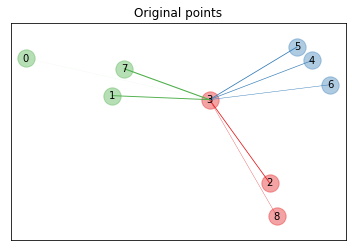

In [3]:
X, y = make_classification(n_samples=9, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1,
                           class_sep=1.0, random_state=0)

plt.figure(1)
ax = plt.gca()
for i in range(X.shape[0]):
    ax.text(X[i, 0], X[i, 1], str(i), va='center', ha='center')
    ax.scatter(X[i, 0], X[i, 1], s=300, c=cm.Set1(y[[i]]), alpha=0.4)

ax.set_title("Original points")
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axis('equal')  # so that boundaries are displayed correctly as circles


def link_thickness_i(X, i):
    diff_embedded = X[i] - X
    dist_embedded = np.einsum('ij,ij->i', diff_embedded,
                              diff_embedded)
    dist_embedded[i] = np.inf

    # compute exponentiated distances (use the log-sum-exp trick to
    # avoid numerical instabilities
    exp_dist_embedded = np.exp(-dist_embedded -
                               logsumexp(-dist_embedded))
    return exp_dist_embedded


def relate_point(X, i, ax):
    pt_i = X[i]
    for j, pt_j in enumerate(X):
        thickness = link_thickness_i(X, i)
        if i != j:
            line = ([pt_i[0], pt_j[0]], [pt_i[1], pt_j[1]])
            ax.plot(*line, c=cm.Set1(y[j]),
                    linewidth=5*thickness[j])


i = 3
relate_point(X, i, ax)
plt.show()

## Learning an embedding
We use :class:`~sklearn.neighbors.NeighborhoodComponentsAnalysis` to learn an
embedding and plot the points after the transformation. We then take the
embedding and find the nearest neighbors.



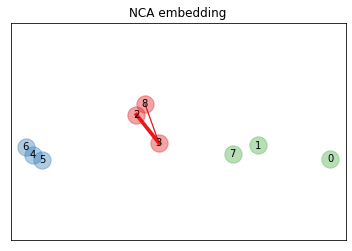

In [4]:
nca = NeighborhoodComponentsAnalysis(max_iter=30, random_state=0)
nca = nca.fit(X, y)

plt.figure(2)
ax2 = plt.gca()
X_embedded = nca.transform(X)
relate_point(X_embedded, i, ax2)

for i in range(len(X)):
    ax2.text(X_embedded[i, 0], X_embedded[i, 1], str(i),
             va='center', ha='center')
    ax2.scatter(X_embedded[i, 0], X_embedded[i, 1], s=300, c=cm.Set1(y[[i]]),
                alpha=0.4)

ax2.set_title("NCA embedding")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
ax2.axis('equal')
plt.show()